<a href="https://colab.research.google.com/github/akashsiddharth1/tripfare-ML-project/blob/main/Tripfare_predict_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRIP FARE PREDICTING ML PROJECT**:



In [17]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Files/taxi_fare.csv')
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [18]:
# Basic exploration

rows = df.shape[0]
columns = df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 212345 rows and 18 columns


In [6]:
# Basic exploration

shape = df.shape
datatypes = df.dtypes
duplicates = df.duplicated().sum()
missing_values = df.isnull().sum()



In [7]:
shape

(212345, 18)

In [8]:
datatypes

,0
VendorID,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
RatecodeID,int64
store_and_fwd_flag,object
dropoff_longitude,float64
dropoff_latitude,float64


In [19]:
duplicates

0

In [10]:
missing_values

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


# Feature Engineering

In [20]:
import numpy as np
from datetime import datetime
from math import radians, cos, sin, asin, sqrt



In [21]:
# Convert datetime to timezone-aware EDT
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], utc=True).dt.tz_convert('America/New_York')
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], utc=True).dt.tz_convert('America/New_York')

In [23]:
# Haversine Formula
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon, dlat = lon2 - lon1, lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    return 6371 * c  # in km

In [24]:
# Create derived features
df['trip_distance'] = df.apply(lambda row: haversine(
    row['pickup_longitude'], row['pickup_latitude'],
    row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['pickup_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
df['am_pm'] = df['pickup_hour'].apply(lambda x: 'am' if x < 12 else 'pm')
df['is_night'] = df['pickup_hour'].apply(lambda x: 1 if x < 6 or x >= 22 else 0)

In [39]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,improvement_surcharge,total_amount,pickup_datetime,dropoff_datetime,trip_distance,pickup_hour,pickup_dayofweek,is_weekend,am_pm,is_night
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.3,12.35,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,3.138096,19,0,0,1,0
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.3,15.35,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,4.303331,19,0,0,1,0
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.3,63.80,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,16.600142,19,0,0,1,0
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.3,41.62,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,9.046547,19,0,0,1,0
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.3,113.80,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,20.400022,19,0,0,1,0


# EDA

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')


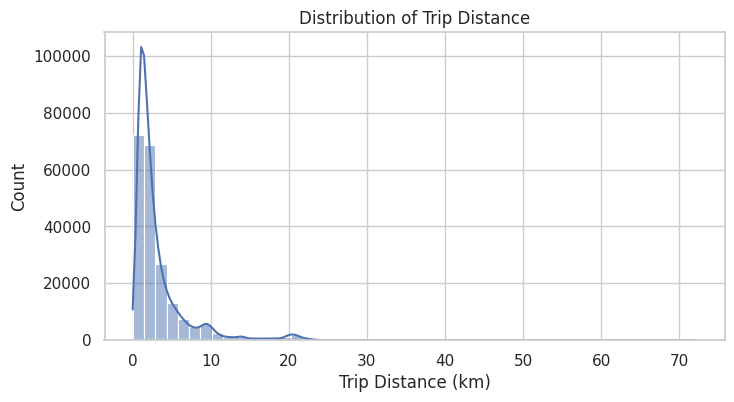

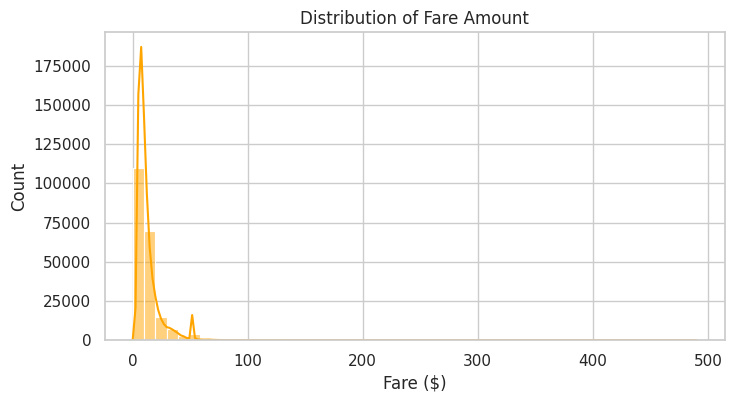

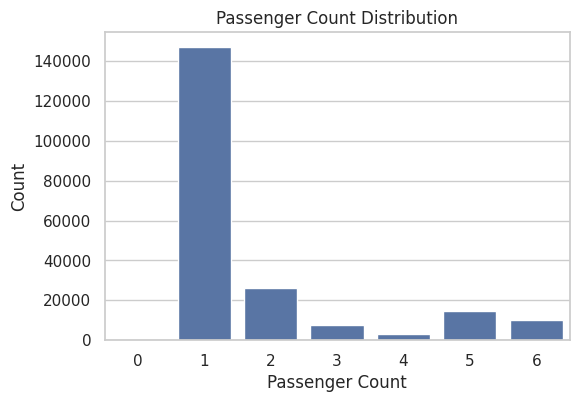

In [31]:
# Histogram of Trip Distance
plt.figure(figsize=(8,4))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.show()

# Histogram of Fare Amount
plt.figure(figsize=(8,4))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='orange')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare ($)')
plt.show()

# Passenger Count
plt.figure(figsize=(6,4))
sns.countplot(x='passenger_count', data=df)
plt.title('Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.show()


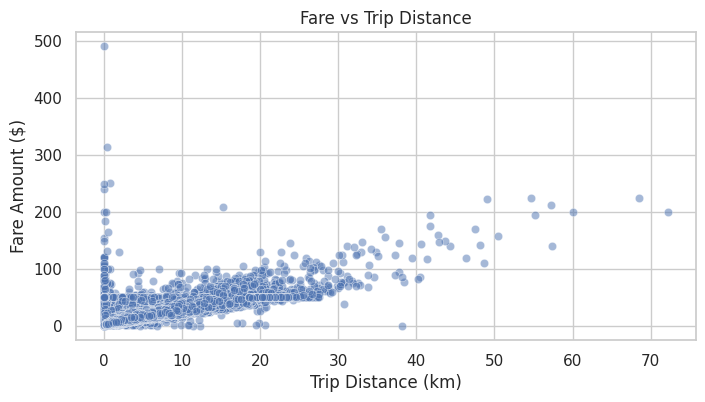

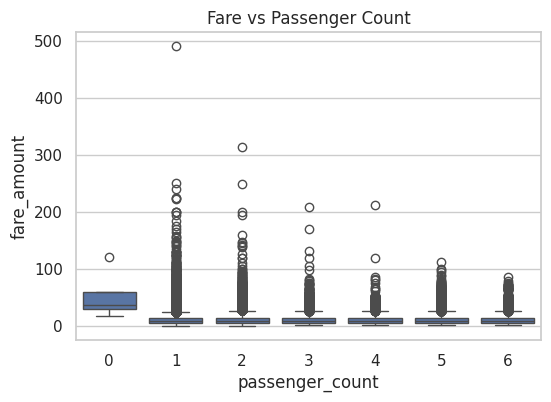

In [32]:
# Fare vs Distance
plt.figure(figsize=(8,4))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5)
plt.title('Fare vs Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Fare vs Passenger Count
plt.figure(figsize=(6,4))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare vs Passenger Count')
plt.show()


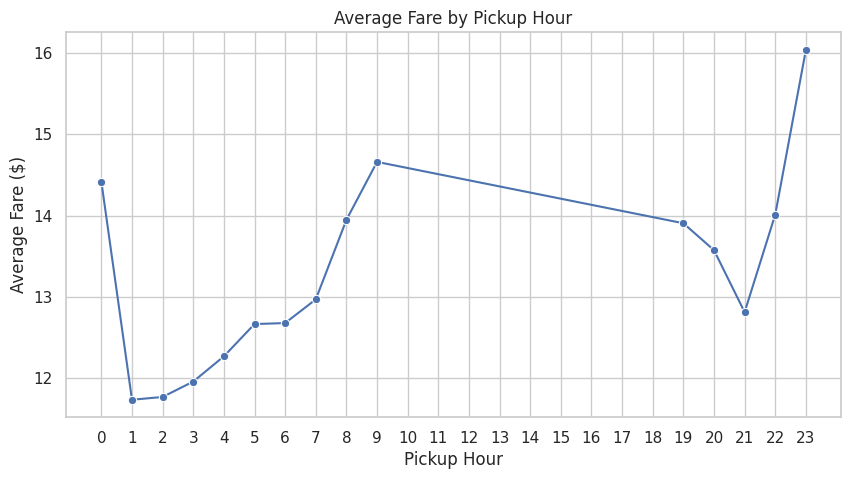

In [33]:
# Average fare per hour
hourly_fare = df.groupby('pickup_hour')['fare_amount'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='pickup_hour', y='fare_amount', data=hourly_fare, marker='o')
plt.title('Average Fare by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Fare ($)')
plt.xticks(range(0, 24))
plt.show()


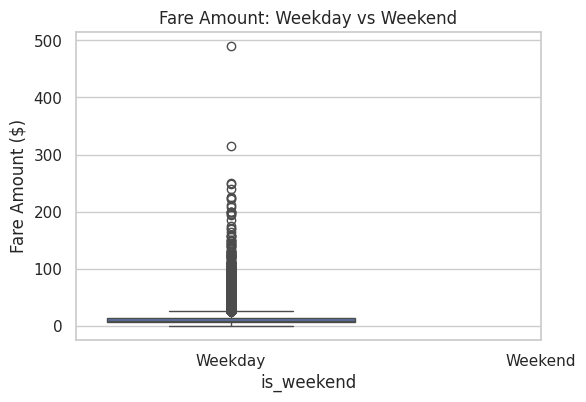

In [34]:
# Weekend vs Weekday Fare

plt.figure(figsize=(6,4))
sns.boxplot(x='is_weekend', y='fare_amount', data=df)
plt.title('Fare Amount: Weekday vs Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ylabel('Fare Amount ($)')
plt.show()


<ipython-input-35-97b02d2add2c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_night', y='fare_amount', data=df, palette='Set2')


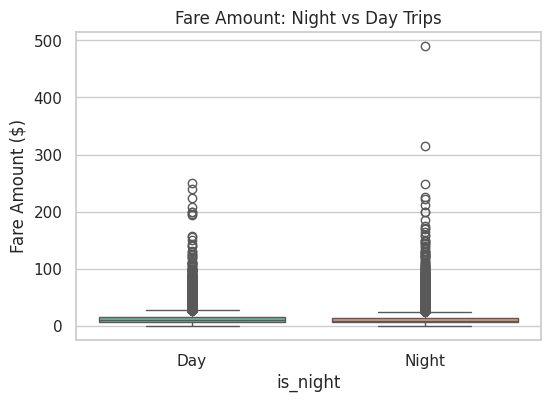

In [35]:
# Nght vs day fares

plt.figure(figsize=(6,4))
sns.boxplot(x='is_night', y='fare_amount', data=df, palette='Set2')
plt.title('Fare Amount: Night vs Day Trips')
plt.xticks([0, 1], ['Day', 'Night'])
plt.ylabel('Fare Amount ($)')
plt.show()


<ipython-input-37-4e118506199b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=df, palette='viridis')


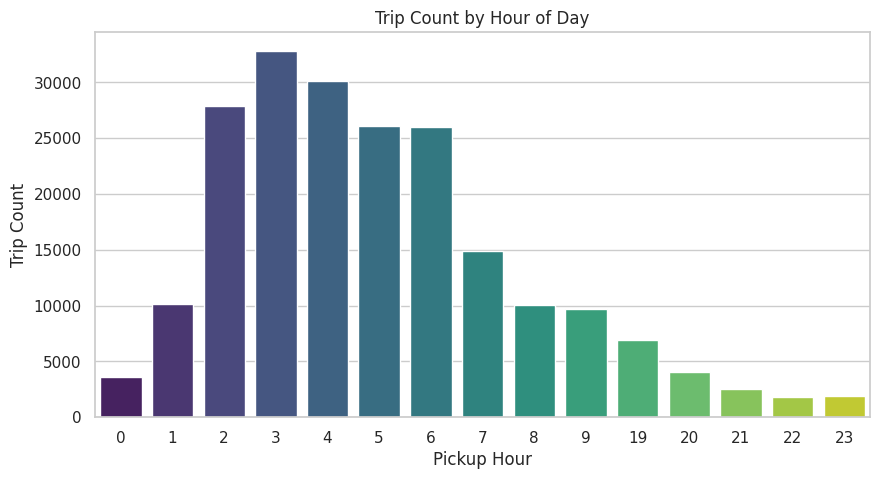

In [37]:
# Trip count by hour

plt.figure(figsize=(10,5))
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title('Trip Count by Hour of Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Count')
plt.show()


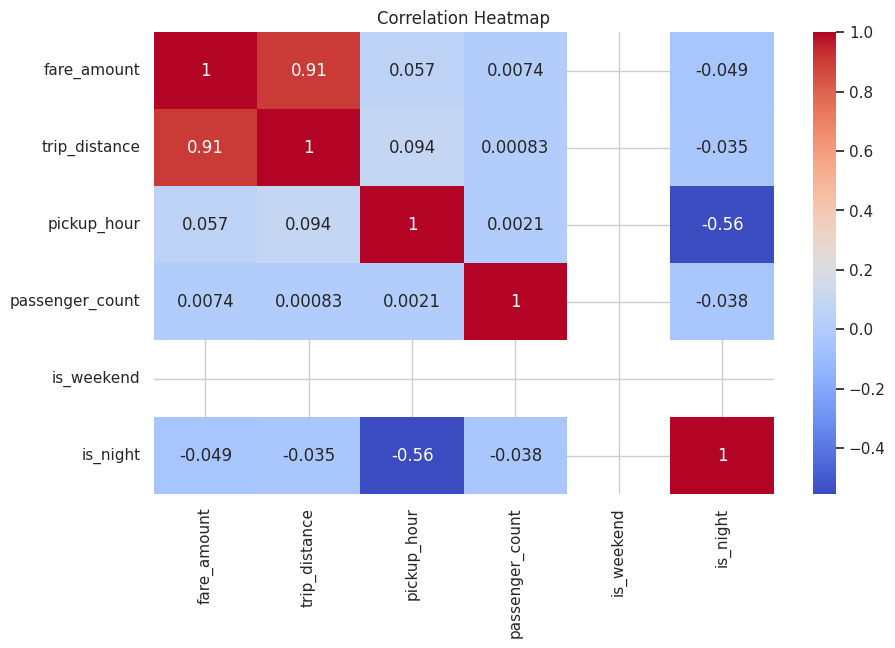

In [38]:
# correlation map

plt.figure(figsize=(10,6))
sns.heatmap(df[['fare_amount', 'trip_distance', 'pickup_hour', 'passenger_count', 'is_weekend', 'is_night']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Data Transformation

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Handle Outliers
**Using IQR method**

In [40]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers in fare_amount and trip_distance
df = remove_outliers_iqr(df, 'fare_amount')
df = remove_outliers_iqr(df, 'trip_distance')


# Fix Skewness in Continuous Variables

In [41]:
# Check skewness before transformation
df[['fare_amount', 'trip_distance']].skew()

# Apply log1p transformation (log(1 + x)) to reduce skew
df['log_fare_amount'] = np.log1p(df['fare_amount'])
df['log_trip_distance'] = np.log1p(df['trip_distance'])

# Drop originals if needed later:
# df.drop(['fare_amount', 'trip_distance'], axis=1, inplace=True)


In [42]:
# Encode categorical
df['am_pm'] = LabelEncoder().fit_transform(df['am_pm'])

# Feature Selection

In [44]:
# Features for model training
features = ['passenger_count', 'log_trip_distance', 'pickup_hour',
            'pickup_dayofweek', 'is_weekend', 'am_pm', 'is_night']

X = df[features]
y = df['log_fare_amount']


# Model Building

In [46]:
# Step 6: Model Building

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'R²': r2_score(y_test, preds),
        'MAE': mean_absolute_error(y_test, preds),
        'RMSE': np.sqrt(mean_squared_error(y_test, preds))
    }

results_df = pd.DataFrame(results).T
print(results_df)


                        R²       MAE      RMSE
LinearRegression  0.722611  0.156826  0.206190
Ridge             0.722611  0.156828  0.206190
Lasso            -0.000055  0.321659  0.391503
RandomForest      0.676194  0.170804  0.222774
GradientBoosting  0.740676  0.151864  0.199363


In [49]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [100, 200],
          'max_depth': [3, 5, 7],
          'learning_rate': [0.01, 0.1, 0.2]}

search = RandomizedSearchCV(GradientBoostingRegressor(), params, cv=3, scoring='r2')
search.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]},
                   scoring='r2')

In [51]:
# Get best model from GridSearchCV
best_model = search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse =np.sqrt(mean_squared_error(y_test, preds))

# Print all metrics
print("Best Model Parameters:", search.best_params_)
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

Best Model Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
R² Score: 0.740664474752089
MAE: 0.15186449056134566
RMSE: 0.19936270531418704


In [52]:
import pickle
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Save the model using pickle
with open("Trip_fare_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as Trip_fare_model.pkl")



Model saved as Trip_fare_model.pkl
